In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

from keras.models import Sequential,Model
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from sklearn.model_selection import train_test_split
from keras.layers import Input,Bidirectional
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer


In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns = cancer.feature_names)
df.isnull().sum().sum()
len(df)

569

In [ ]:
X = df  # training feature
Y =  pd.Series(cancer.target)

len(X)

569

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.20,shuffle= True,random_state=2)

In [ ]:
model = Sequential()
model.add(LSTM(30, activation='relu', input_shape=(30, 1)))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', 
metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,681
Trainable params: 4,681
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=5)

Epoch 1/10
73/73 [==============================] - 16s 66ms/step - loss: 1.8229 - accuracy: 0.6813 - val_loss: 0.4164 - val_accuracy: 0.6593
Epoch 2/10
73/73 [==============================] - 5s 71ms/step - loss: 0.3338 - accuracy: 0.8736 - val_loss: 0.2413 - val_accuracy: 0.9231
Epoch 3/10
73/73 [==============================] - 4s 50ms/step - loss: 0.2288 - accuracy: 0.9066 - val_loss: 0.2162 - val_accuracy: 0.9121
Epoch 4/10
73/73 [==============================] - 4s 49ms/step - loss: 0.2674 - accuracy: 0.8736 - val_loss: 0.2425 - val_accuracy: 0.8791
Epoch 5/10
73/73 [==============================] - 5s 64ms/step - loss: 0.2197 - accuracy: 0.9121 - val_loss: 0.1731 - val_accuracy: 0.9341
Epoch 6/10
73/73 [==============================] - 3s 48ms/step - loss: 0.1946 - accuracy: 0.9011 - val_loss: 0.1547 - val_accuracy: 0.9451
Epoch 7/10
73/73 [==============================] - 4s 49ms/step - loss: 0.1836 - accuracy: 0.9231 - val_loss: 0.1574 - val_accuracy: 0.9231
Epoch 8/10
7

In [ ]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[5.2917032e-14],
       [1.3176625e-16],
       [9.6511037e-08],
       [0.0000000e+00],
       [2.4036703e-19],
       [0.0000000e+00],
       [6.1996540e-11],
       [3.7360840e-13],
       [1.4309785e-11],
       [5.3861030e-16],
       [6.5281775e-25],
       [2.1068423e-10],
       [2.6452163e-09],
       [4.9706682e-14],
       [2.0263313e-10],
       [0.0000000e+00],
       [7.2240774e-10],
       [6.6048028e-10],
       [7.6813958e-11],
       [0.0000000e+00],
       [7.1700701e-11],
       [3.4430950e-10],
       [5.9525643e-13],
       [7.1779358e-12],
       [1.7470058e-15],
       [0.0000000e+00],
       [2.8268908e-14],
       [4.3363802e-17],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.4606664e-18],
       [2.2017057e-11],
       [1.4243852e-12],
       [3.3850699e-17],
       [0.0000000e+00],
       [8.8594930e-12],
       [8.1145247e-13],
       [2.8531834e-22],
       [2.5739753e-08],
       [8.5926828e-08],
       [0.0000000e+00],
       [6.543908

In [ ]:
# Error of predictions
#train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, y_pred))
# Print RMSE
#print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))   

Test RMSE: 0.778 RMSE


In [ ]:
model1 = Sequential()
model1.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(30, 1)))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model1.fit(X_train,Y_train, epochs=10, validation_split=0.2, batch_size=5)

Epoch 1/10
73/73 [==============================] - 12s 103ms/step - loss: 105.3243 - val_loss: 1.3083
Epoch 2/10
73/73 [==============================] - 8s 107ms/step - loss: 1.0208 - val_loss: 0.5002
Epoch 3/10
73/73 [==============================] - 7s 92ms/step - loss: 0.4008 - val_loss: 0.2618
Epoch 4/10
73/73 [==============================] - 8s 109ms/step - loss: 0.2206 - val_loss: 0.1990
Epoch 5/10
73/73 [==============================] - 8s 108ms/step - loss: 0.1637 - val_loss: 0.1525
Epoch 6/10
73/73 [==============================] - 7s 92ms/step - loss: 0.1322 - val_loss: 0.1313
Epoch 7/10
73/73 [==============================] - 8s 108ms/step - loss: 0.1160 - val_loss: 0.1154
Epoch 8/10
73/73 [==============================] - 7s 89ms/step - loss: 0.1032 - val_loss: 0.0981
Epoch 9/10
73/73 [==============================] - 8s 108ms/step - loss: 0.0910 - val_loss: 0.0978
Epoch 10/10
73/73 [==============================] - 8s 107ms/step - loss: 0.0889 - val_loss: 0.0838

In [ ]:
test_output = model1.predict(X_test, verbose=0)

In [ ]:
test_rmse = math.sqrt(mean_squared_error(Y_test, test_output))
# Print RMSE
#print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))   

Test RMSE: 0.300 RMSE


In [ ]:
def plot_result(X_test,Y_test, test_output):
    actual = np.append(Y_test, Y_test)
    predictions = np.append(test_output, test_output)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(Y_test), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

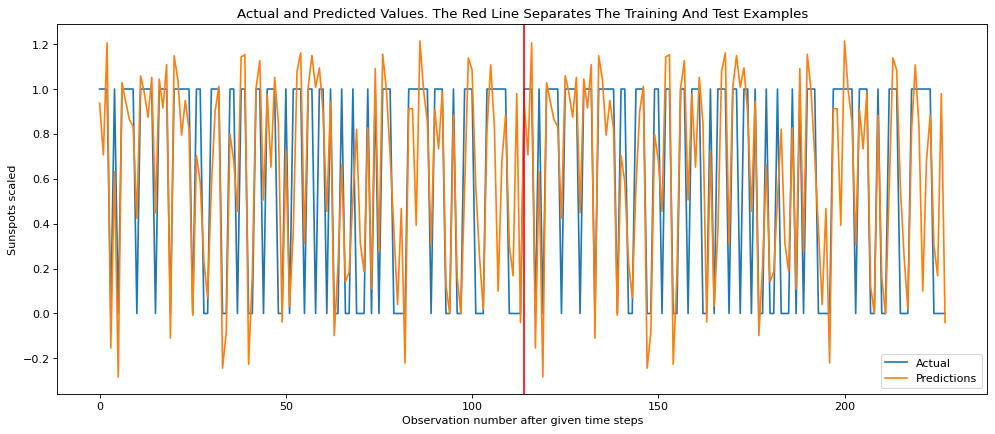

In [ ]:
plot_result(X_test,Y_test, test_output)